## Energy Usage Forecasting

In [1]:
!pip install gdown

In [2]:
fiel_path="https://drive.google.com/file/d/10srb_7Vc1JY38zirs59f5kjBRrNDqTFl/view?usp=drive_link"

In [3]:
import gdown


file_id = '10srb_7Vc1JY38zirs59f5kjBRrNDqTFl'
output_path = 'individual+household+electric+power+consumption.txt'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, fuzzy=True)

# Read the downloaded CSV file into a pandas DataFrame


Downloading...
From: https://drive.google.com/uc?id=10srb_7Vc1JY38zirs59f5kjBRrNDqTFl
To: /content/individual+household+electric+power+consumption.txt
100%|██████████| 20.6M/20.6M [00:00<00:00, 41.6MB/s]


'individual+household+electric+power+consumption.txt'

In [4]:
!unzip individual+household+electric+power+consumption.txt

Archive:  individual+household+electric+power+consumption.txt
  inflating: household_power_consumption.txt  


## load the data

In [5]:
# let's import neccessary data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:


# 1. READ .txt directly (semicolon-separated)
df = pd.read_csv('household_power_consumption.txt',
                 sep=';',  # Key: semicolon delimiter
                 parse_dates={'datetime': [0,1]},  # Combine Date + Time
                 infer_datetime_format=True,
                 low_memory=False,
                 na_values=['nan','?'])

# 2. SAVE as clean .csv (2 seconds)
df.to_csv('household_power_consumption.csv', index=False)
print("✓ Converted to CSV:", df.shape)  # (2M rows, 9 cols)


/tmp/ipython-input-3462802383.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt',
/tmp/ipython-input-3462802383.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt',
/tmp/ipython-input-3462802383.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt',


✓ Converted to CSV: (2075259, 8)


In [7]:
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


the data is minute level


In [8]:
df.shape

(2075259, 8)

In [9]:
df.dtypes

,0
datetime,datetime64[ns]
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


this the description of the feature
| Feature               | Description                                                            | Units | Role                       |
| --------------------- | ---------------------------------------------------------------------- | ----- | -------------------------- |
| datetime              | Timestamp (Date + Time combined)                                       | -     | Index                      |
| Global_active_power   | Household global minute-averaged active power (total electricity used) | kW    | TARGET ⭐                   |
| Global_reactive_power | Household global minute-averaged reactive power                        | kW    | Feature                    |
| Voltage               | Minute-averaged voltage                                                | V     | Feature (strong predictor) |
| Global_intensity      | Household global minute-averaged current                               | A     | Feature (temp proxy)       |
| Sub_metering_1        | Kitchen: dishwasher, oven, microwave                                   | Wh    | Feature                    |
| Sub_metering_2        | Laundry: washing-machine, dryer, fridge, light                         | Wh    | Feature                    |
| Sub_metering_3        | Water/AC: electric water-heater, air-conditioner                       | Wh    | Feature                    |

In [10]:
# @title
features = {
    'Global_active_power': 'household global minute-averaged active power (in kilowatt) - TARGET',
    'Voltage': 'minute-averaged voltage (in volt) ',
    'Global_intensity': 'household global minute-averaged current intensity (in ampere)',
    'Sub_metering_1': 'energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).',
    'Sub_metering_2': 'energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.',
    'Sub_metering_3': 'energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.'
}

The Date object already convert into date time format when importing it

In [11]:
df.isna().mean()*100


,0
datetime,0.000000
Global_active_power,1.251844
Global_reactive_power,1.251844
Voltage,1.251844
Global_intensity,1.251844
Sub_metering_1,1.251844
Sub_metering_2,1.251844
Sub_metering_3,1.251844


let's drop target is nan

In [12]:
# let's dropna if the target column is nan
df.dropna(subset=['Global_active_power'], inplace=True)

In [13]:
df.isna().sum()


,0
datetime,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


there is no nan values on our data set

let's see the data what looks like

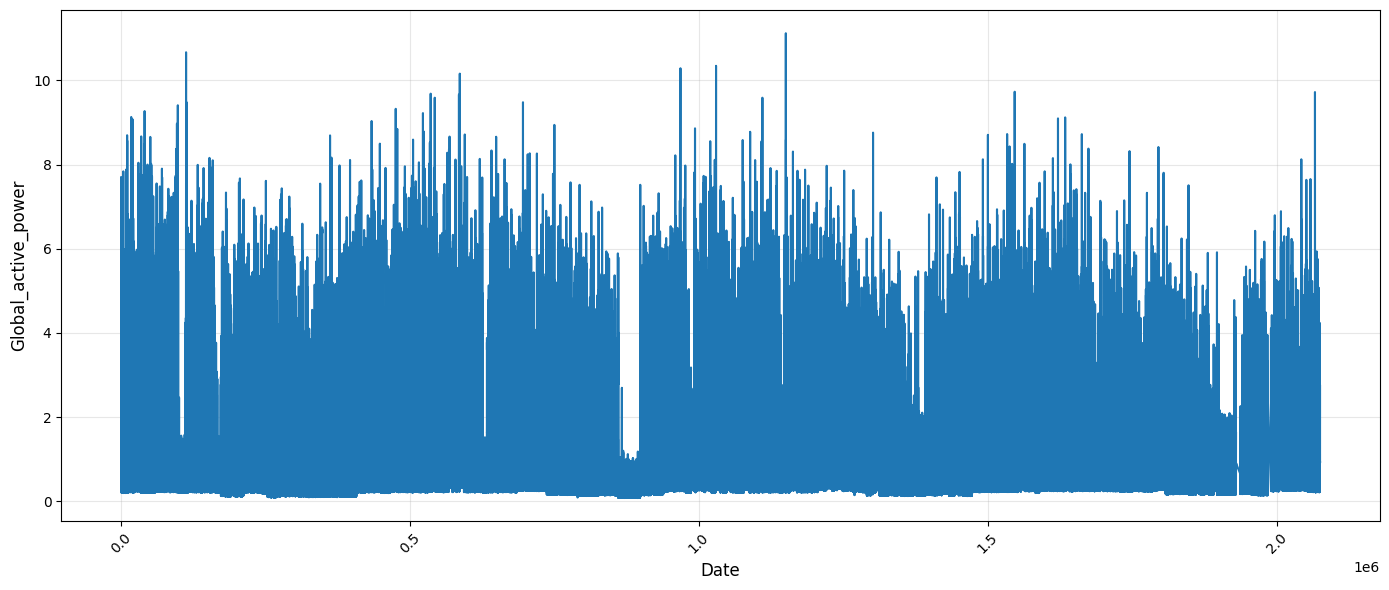

In [14]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Global_active_power'], linewidth=1.5)

plt.title('', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Global_active_power', fontsize=12)

plt.grid(True, alpha=0.3)

# Improve date formatting
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## for better visualization let's Use seasonal decomposition

This automatically extracts trend, seasonality, and residual noise.

 **before doing the dataset is in minute-level,This is too granular and too noisy for most forecasting models.**

 ##Why hourly resampling is recommended:
**1. Reduces noise**

* Minute-level energy data is extremely spiky.
Hourly averages make the pattern clearer.

**2. Matches natural energy usage cycles**

Electricity patterns follow:

  * morning peaks

  * evening peaks

  * daily cycles

  * weekly cycles

These are visible on hourly, not minute.

**3. Models perform far better**

* ARIMA, Prophet, LightGBM, XGBoost, LSTM all work better on hourly aggregated data.

**4. Reduces computational cost**

* From 2,075,259 rows → ~35,000 rows after hourly resampling.

**5. Common in industry**

Smart meter data is usually stored at:

* 15-min (Europe)

* 30-min (UK)

* 60-min (USA)

So your transformation matches real-world practice.

## Which one is better resampling into hourly or daily ?
Neither hourly nor daily aggregation is inherently "better";
 the choice depends on your goal: hourly retains fine-grained patterns (good for quick responses, complex seasonality) but needs more power and risks noise, while daily offers stability, fewer resources, and suits long-term trends but misses short-term spikes, **so use hourly for detailed, rapid needs and daily for robust, long-term insights.**

Choose Hourly Aggregation If:

* **You need high detail:** You want to capture patterns within a day, like hour-of-day effects, or react quickly to short-term changes (e.g., trading, system alerts).
* **Your system has complex seasonality:** You need to see patterns that repeat daily (e.g., morning rush hour, weekend dips).
You have significant computational power: More data points mean more processing.

Choose Daily Aggregation If:

* **You focus on long-term trends:** You're interested in weekly, monthly, or yearly patterns, not minute-to-minute fluctuations (e.g., energy consumption, sales forecasting).
* You need stability: Daily data smooths out noise, leading to more stable forecasts for long horizons.
* You have limited resources: Daily data is smaller and easier to manage.

**Key Considerations:**

* Seasonality: Hourly data captures daily seasonality; daily data captures weekly/monthly/annual patterns.

* Data Volume: Minute data creates massive datasets; aggregation reduces size.

* Purpose: Trading (hourly) vs. strategic planning (daily).
* Loss of Information: Aggregating loses the minute-level detail; not aggregating can overwhelm models with noise.

* Best Practice: Start with the finest granularity (minutes) and aggregate only as needed for your specific analysis or modeling task, always considering the trade-offs.

when resampling the data into hourly the given number is kw so to convert into kwh we use the below fromula

    Energy (kWh) = Power (kW) × (1/60) hours

In [15]:
df.set_index('datetime', inplace=True)

df_hourly = df.resample('H').agg({
    'Voltage': 'mean',
    'Global_intensity': 'mean',

    # Reactive & Active Power (kW) → convert to kWh
    'Global_active_power': lambda x: x.sum() / 60,
    'Global_reactive_power': lambda x: x.sum() / 60,

    # Sub-metering (Wh energy) → sum directly (do NOT divide)
    'Sub_metering_1': 'sum',
    'Sub_metering_2': 'sum',
    'Sub_metering_3': 'sum'
})

df_hourly = df_hourly.dropna()
print(df_hourly.shape)


/tmp/ipython-input-3621803575.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').agg({


(34168, 7)


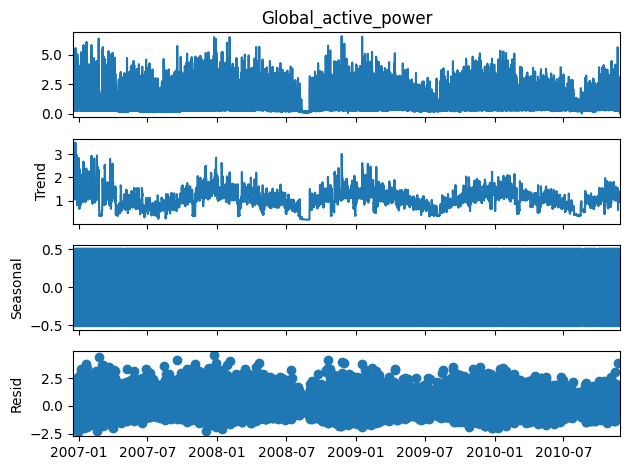

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# ✅ CORRECT: Use df_hourly['Global_active_power']
result = seasonal_decompose(df_hourly['Global_active_power'],
                           model='additive', period=24)  # Daily cycle
result.plot()
# plt.suptitle('Hourly Energy: Daily Seasonality (period=24)', fontsize=14)
plt.savefig('seasonal_decomposition.png')
plt.show()


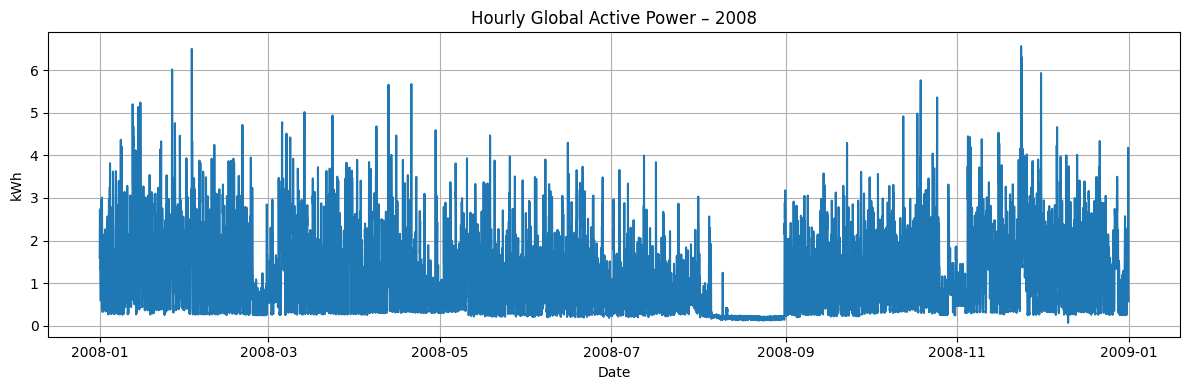

In [17]:
import matplotlib.pyplot as plt

one_year = df_hourly.loc['2008']

plt.figure(figsize=(12, 4))
plt.plot(one_year.index, one_year['Global_active_power'])
plt.title('Hourly Global Active Power – 2008')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.grid(True)
plt.tight_layout()
plt.savefig('hourly_power_2008.png')
plt.show()


## checking the stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller,kpss
def adf_test(series, title=''):
  print(f'ADF Test: {title}')
  result = adfuller(series, autolag='AIC')
  adf_stat, pvalue, usedlag, nobs, crit_vals, icbest = result
  print(f' ADF statistic: {adf_stat:.4f}')
  print(f' p-value: {pvalue:.4f}')
  print(' Critical values:')
  for k, v in crit_vals.items():
    print(f' {k}: {v:.4f}') # example: df['temp'] is your series
adf_test(df_hourly['Global_active_power'], 'Original series')

ADF Test: Original series
 ADF statistic: -14.2255
 p-value: 0.0000
 Critical values:
 1%: -3.4305
 5%: -2.8616
 10%: -2.5668


In [19]:
# from video we can check data stationarity simply
adf_test=adfuller(df_hourly['Global_active_power'])
print(adf_test[1])

1.6301137853685617e-26


kpss test

In [20]:
# y is your 1D Series, e.g. df['Temp']
stat, p_value, lags, crit = kpss(df_hourly['Global_active_power'], regression='c', nlags='auto')
print('KPSS statistic:', stat)
print('p-value:', p_value)
print('lags used:', lags)
print('critical values:', crit)

KPSS statistic: 1.1245478373193916
p-value: 0.01
lags used: 65
critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/tmp/ipython-input-681568318.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p_value, lags, crit = kpss(df_hourly['Global_active_power'], regression='c', nlags='auto')


In [21]:
# 1) Original hourly series
y = df_hourly['Global_active_power']

# 2) First difference (d = 1)
y_diff1 = y.diff().dropna()

print(y.head())
print(y_diff1.head())


datetime
2006-12-16 17:00:00    2.533733
2006-12-16 18:00:00    3.632200
2006-12-16 19:00:00    3.400233
2006-12-16 20:00:00    3.268567
2006-12-16 21:00:00    3.056467
Name: Global_active_power, dtype: float64
datetime
2006-12-16 18:00:00    1.098467
2006-12-16 19:00:00   -0.231967
2006-12-16 20:00:00   -0.131667
2006-12-16 21:00:00   -0.212100
2006-12-16 22:00:00   -0.856333
Name: Global_active_power, dtype: float64


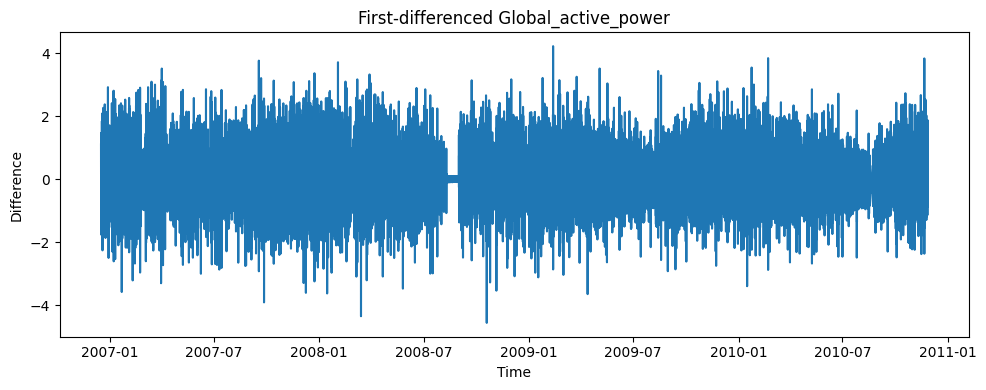

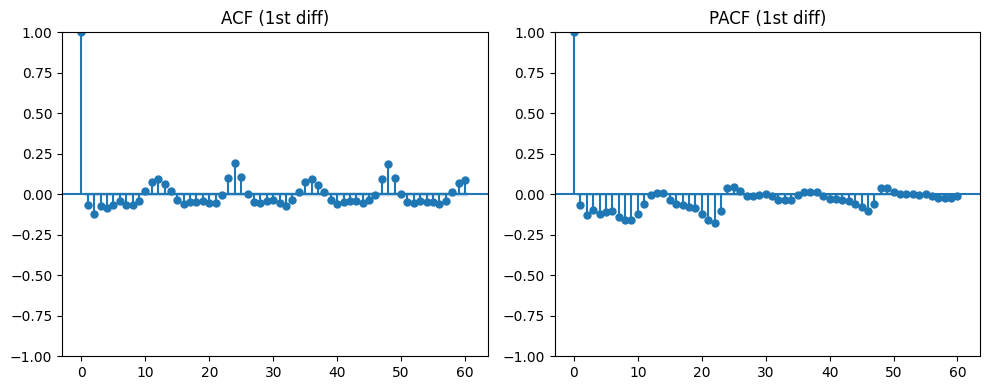

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 4))
plt.plot(y_diff1)
plt.title('First-differenced Global_active_power')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_acf(y_diff1, lags=60, ax=axes[0])
plot_pacf(y_diff1, lags=60, ax=axes[1])
axes[0].set_title('ACF (1st diff)')
axes[1].set_title('PACF (1st diff)')
plt.tight_layout()
plt.savefig('acf_pacf_1st_diff.png')
plt.show()


In [23]:
from statsmodels.tsa.stattools import adfuller, kpss

adf_result = adfuller(y_diff1, autolag='AIC')
print('ADF p-value (1st diff):', adf_result[1])

kpss_result = kpss(y_diff1, regression='c', nlags='auto')
print('KPSS p-value (1st diff):', kpss_result[1])


ADF p-value (1st diff): 0.0
KPSS p-value (1st diff): 0.1


/tmp/ipython-input-259338441.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(y_diff1, regression='c', nlags='auto')


In [24]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# split
train = df_hourly.iloc[:-24*7]     # last 1 week test
test  = df_hourly.iloc[-24*7:]

# univariate target
y_train = train['Global_active_power']
y_test  = test['Global_active_power']

# SARIMA example: (p,d,q)x(P,D,Q,24)
model = SARIMAX(y_train,
                order=(2,1,2),
                seasonal_order=(1,1,1,24))
fit_model = model.fit(disp=False)

# forecast
sarima_pred = fit_model.forecast(steps=len(y_test))

mse = mean_squared_error(y_test, sarima_pred)
rmse_sarima = np.sqrt(mse)

print("SARIMA RMSE:", rmse_sarima)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA RMSE: 0.6509734763895927


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [25]:
rmse_sarima

np.float64(0.6509734763895927)

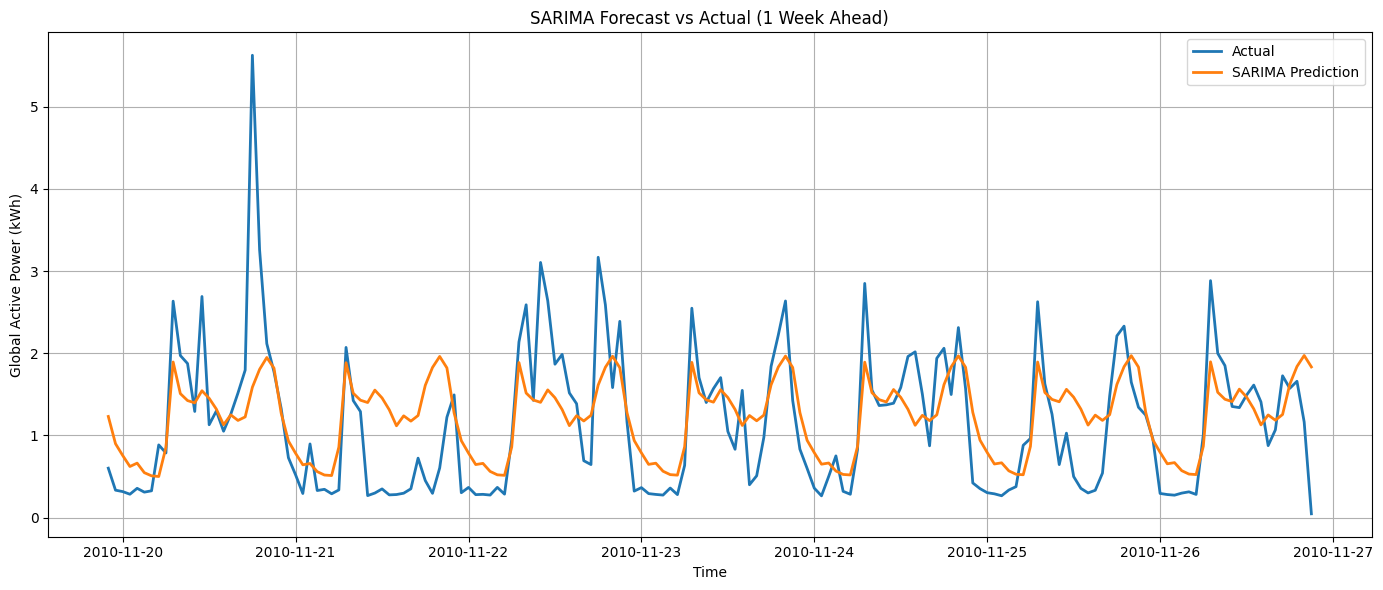

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.plot(y_test.index, y_test, label='Actual', linewidth=2)
plt.plot(y_test.index, sarima_pred, label='SARIMA Prediction', linewidth=2)

plt.title('SARIMA Forecast vs Actual (1 Week Ahead)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('sarima_forecast.png')
plt.show()
